### Name: Thijs Anglim
### Project: Final Data Science Project
### Data Set: Magic the Gathering Draft Cards
### Due Dates: 12/18/24

# Importing tools

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

### The following dataset came from Kaggle.com 

In [115]:
dfMtg = pd.read_csv('/Users/thijsanglim/Downloads/mtgOulawCards.csv')

# Initial Data Frame
### The Data frame represents all the cards created for a set of the card game "Magic The Gathering (MTG)". 
### MTG is a popular paper card game, but it also has a digital platform called "MTG Arena". 
### The following data is pulled from statistics related to how cards from the set "Outlaws of Thunder Junction" were picked and played in the "Draft Format".
### Draft is a gamemode where each player is given a small groups of cards and they must choose one to keep and give the remaining cards to their neighboring opponent until all cards are taken from each round of drafting. 

In [118]:
dfMtg

,Name,Color,Rarity,# Seen,ALSA,# Picked,ATA,# GP,% GP,GP WR,# OH,OH WR,# GD,GD WR,# GIH,GIH WR,# GNS,GNS WR,IWD
0,Another Round,W,R,64972,6.27,7953,9.59,1690,3.6%,46.6%,259,NaN,402,NaN,661,40.4%,1029,50.6%,-10.2pp
1,Archangel of Tithes,W,M,9905,2.08,3697,2.15,18171,82.7%,53.9%,2952,54.6%,4325,55.8%,7277,55.3%,10927,52.9%,2.4pp
2,Armored Armadillo,W,C,378941,7.89,40803,11.61,31423,12.9%,51.0%,5421,50.0%,7265,50.8%,12686,50.4%,18704,51.3%,-0.9pp
3,Aven Interrupter,W,R,24080,2.42,8609,2.64,44852,86.6%,55.5%,7735,56.6%,10692,57.5%,18427,57.1%,26391,54.3%,2.8pp
4,Bounding Felidar,W,U,98493,4.11,18079,5.53,86683,80.2%,54.6%,13034,53.6%,20093,55.4%,33127,54.7%,52462,54.4%,0.3pp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Contagion Engine,NaN,M,6499,2.44,2472,2.60,12573,86.4%,52.4%,1991,48.6%,3242,55.9%,5233,53.1%,7311,51.9%,1.2pp
372,Grindstone,NaN,M,14203,4.84,1594,7.38,2175,23.5%,45.4%,400,NaN,588,46.4%,988,42.3%,1184,48.1%,-5.7pp
373,Mindslaver,NaN,M,9966,3.52,2026,4.30,7316,62.8%,51.0%,1162,47.9%,1879,51.7%,3041,50.2%,4262,51.6%,-1.3pp
374,Unlicensed Hearse,NaN,R,18252,3.05,4295,3.70,20486,81.8%,51.7%,3527,51.1%,5119,53.1%,8646,52.3%,11831,51.2%,1.2pp


In [120]:
dfMtg.columns

Index(['Name', 'Color', 'Rarity', '# Seen', 'ALSA', '# Picked', 'ATA', '# GP',
       '% GP', 'GP WR', '# OH', 'OH WR', '# GD', 'GD WR', '# GIH', 'GIH WR',
       '# GNS', 'GNS WR', 'IWD'],
      dtype='object')

In [122]:
dfMtg.rename(columns= {'Name':'name', 'Color':'color', 'Rarity':'rarity', '# Seen':'occurence', 'ALSA':'averageSeen', '# Picked':'numberPicks', 'ATA':'averagePick', '# GP':'gamesPlayed',
       '% GP':'playedPercentage', 'GP WR':'winrate', '# OH':'openingHandTotal', 'OH WR':'openingHandWinrate', '# GD':'drawnTotal', 'GD WR':'drawnWinrate', '# GIH':'inHand', 'GIH WR':'inHandWinrate',
       '# GNS':'notSeen', 'GNS WR':'notSeenWinrate', 'IWD':'improvement'},inplace = True)

In [124]:
dfMtg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                376 non-null    object 
 1   color               330 non-null    object 
 2   rarity              376 non-null    object 
 3   occurence           376 non-null    int64  
 4   averageSeen         376 non-null    float64
 5   numberPicks         376 non-null    int64  
 6   averagePick         375 non-null    float64
 7   gamesPlayed         376 non-null    int64  
 8   playedPercentage    376 non-null    object 
 9   winrate             368 non-null    object 
 10  openingHandTotal    376 non-null    int64  
 11  openingHandWinrate  345 non-null    object 
 12  drawnTotal          376 non-null    int64  
 13  drawnWinrate        353 non-null    object 
 14  inHand              376 non-null    int64  
 15  inHandWinrate       360 non-null    object 
 16  notSeen 

# What each column stands for:
### 'name': Name of the card
### 'color': The color or element of the card. 
#### MTG cards have one or more of five colors: White (w), Blue (U), Black (B), Red (R) and Green (G). A Null value means the card is colorless (Colorless cards are often artifact cards, but card types are not considered in the data set).
### 'rarity': The rarity of the card
#### MTG cards have one of four rarities from least to most rare: Common (C), Uncommon (U), Rare (R) and Mythic (M)
### 'occurence': The amount of times a card was seen by a player. 
#### Cards that are picked quicker are seen less.
### 'averageSeen': The average amount of times the card is seen per game. 
### 'numberPicks': The total amount of times a card was picked by a player.
### 'averagePick': The average of how quickly a card is chosen. 
#### The lower the number, the quicker it was chosen.
### 'gamesPlayed': The number of games the card was in a playing deck, weighted by duplicates.
### 'playedPercentage': The rate at which the card was included in the deck (when available in the card pool).
### 'winrate': The win rate of decks with at least one copy of this card in the maindeck, weighted by duplicates.
### 'openingHandTotal': The amount of times the card was in the player's opening hand.
### 'openingHandWinrate': The win rate of a card that started in the opening hand.
### 'drawnTotal': The amount of times the card was drawn in a game from the deck, weighted by duplicates.
### 'drawnWinrate': The win rate of a card that was drawn into the winner's hand.
### 'inHand': The amount of times the card was in a player's hand each game, weighted by duplicates.
### 'inHandWinrate': The win rate of a card that was in the winner's hand at any point of the game.
### 'notSeen': The total amount of times a card was in the deck, but was not seen in the game.
### 'notSeenWinrate': The win rate for a card that was not seen when the winner played the game.
### improvement: 'the difference between the inHandWinrate and notSeenWinrate'

In [127]:
dfMtg

,name,color,rarity,occurence,averageSeen,numberPicks,averagePick,gamesPlayed,playedPercentage,winrate,openingHandTotal,openingHandWinrate,drawnTotal,drawnWinrate,inHand,inHandWinrate,notSeen,notSeenWinrate,improvement
0,Another Round,W,R,64972,6.27,7953,9.59,1690,3.6%,46.6%,259,NaN,402,NaN,661,40.4%,1029,50.6%,-10.2pp
1,Archangel of Tithes,W,M,9905,2.08,3697,2.15,18171,82.7%,53.9%,2952,54.6%,4325,55.8%,7277,55.3%,10927,52.9%,2.4pp
2,Armored Armadillo,W,C,378941,7.89,40803,11.61,31423,12.9%,51.0%,5421,50.0%,7265,50.8%,12686,50.4%,18704,51.3%,-0.9pp
3,Aven Interrupter,W,R,24080,2.42,8609,2.64,44852,86.6%,55.5%,7735,56.6%,10692,57.5%,18427,57.1%,26391,54.3%,2.8pp
4,Bounding Felidar,W,U,98493,4.11,18079,5.53,86683,80.2%,54.6%,13034,53.6%,20093,55.4%,33127,54.7%,52462,54.4%,0.3pp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Contagion Engine,NaN,M,6499,2.44,2472,2.60,12573,86.4%,52.4%,1991,48.6%,3242,55.9%,5233,53.1%,7311,51.9%,1.2pp
372,Grindstone,NaN,M,14203,4.84,1594,7.38,2175,23.5%,45.4%,400,NaN,588,46.4%,988,42.3%,1184,48.1%,-5.7pp
373,Mindslaver,NaN,M,9966,3.52,2026,4.30,7316,62.8%,51.0%,1162,47.9%,1879,51.7%,3041,50.2%,4262,51.6%,-1.3pp
374,Unlicensed Hearse,NaN,R,18252,3.05,4295,3.70,20486,81.8%,51.7%,3527,51.1%,5119,53.1%,8646,52.3%,11831,51.2%,1.2pp


# Cleaning the dataset
## My research questions:
### A: What colors of cards in the dataset are the most played?
### B: Is there a strong correlation between card rarity and Win rates?
### C: Does one color win more games than others? 
### D: In drafting games, do cards picked early tend to win more?
### E: Do cards played a lot in games that they can be played have higher win rates?

In [130]:
dfMtg.columns

Index(['name', 'color', 'rarity', 'occurence', 'averageSeen', 'numberPicks',
       'averagePick', 'gamesPlayed', 'playedPercentage', 'winrate',
       'openingHandTotal', 'openingHandWinrate', 'drawnTotal', 'drawnWinrate',
       'inHand', 'inHandWinrate', 'notSeen', 'notSeenWinrate', 'improvement'],
      dtype='object')

In [132]:
dfMtg.drop(columns = ['occurence', 'averageSeen','openingHandTotal', 'openingHandWinrate', 'drawnTotal', 'drawnWinrate',
       'inHand', 'inHandWinrate', 'notSeen', 'notSeenWinrate', 'improvement'], inplace = True)

In [134]:
dfMtg

,name,color,rarity,numberPicks,averagePick,gamesPlayed,playedPercentage,winrate
0,Another Round,W,R,7953,9.59,1690,3.6%,46.6%
1,Archangel of Tithes,W,M,3697,2.15,18171,82.7%,53.9%
2,Armored Armadillo,W,C,40803,11.61,31423,12.9%,51.0%
3,Aven Interrupter,W,R,8609,2.64,44852,86.6%,55.5%
4,Bounding Felidar,W,U,18079,5.53,86683,80.2%,54.6%
...,...,...,...,...,...,...,...,...
371,Contagion Engine,NaN,M,2472,2.60,12573,86.4%,52.4%
372,Grindstone,NaN,M,1594,7.38,2175,23.5%,45.4%
373,Mindslaver,NaN,M,2026,4.30,7316,62.8%,51.0%
374,Unlicensed Hearse,NaN,R,4295,3.70,20486,81.8%,51.7%


# Checking the number of null values
### Null values color does not matter much because colorless cards exist. 
### However, some cards are missing winrate values and one card is missing an averagePick value.
### I researched the names of the cards with missing values for win rates and pick numbers and all of the cards with NAN values have had a play percentage that was below 3%

In [137]:
dfMtg.isna().sum()

name                 0
color               46
rarity               0
numberPicks          0
averagePick          1
gamesPlayed          0
playedPercentage     0
winrate              8
dtype: int64

#### I decided to change the nan values within the 'color' column to be 'C', which is used by many MTG players for colorless cards.

In [140]:
dfMtg['color'] = dfMtg['color'].fillna('C')

In [142]:
dfMtg

,name,color,rarity,numberPicks,averagePick,gamesPlayed,playedPercentage,winrate
0,Another Round,W,R,7953,9.59,1690,3.6%,46.6%
1,Archangel of Tithes,W,M,3697,2.15,18171,82.7%,53.9%
2,Armored Armadillo,W,C,40803,11.61,31423,12.9%,51.0%
3,Aven Interrupter,W,R,8609,2.64,44852,86.6%,55.5%
4,Bounding Felidar,W,U,18079,5.53,86683,80.2%,54.6%
...,...,...,...,...,...,...,...,...
371,Contagion Engine,C,M,2472,2.60,12573,86.4%,52.4%
372,Grindstone,C,M,1594,7.38,2175,23.5%,45.4%
373,Mindslaver,C,M,2026,4.30,7316,62.8%,51.0%
374,Unlicensed Hearse,C,R,4295,3.70,20486,81.8%,51.7%


### Handling the NAN values for the lone averagePick value and the null winrate values

In [145]:
dfMtg['averagePick'] = dfMtg['averagePick'].fillna(0)
dfMtg['winrate'] = dfMtg['winrate'].fillna(0)

#### Removing the percentage symbols from values

In [148]:
dfMtg['playedPercentage']=dfMtg['playedPercentage'].replace({'%': ''}, regex=True).astype(float)

In [150]:
dfMtg['playedPercentage']

0       3.6
1      82.7
2      12.9
3      86.6
4      80.2
       ... 
371    86.4
372    23.5
373    62.8
374    81.8
375     5.0
Name: playedPercentage, Length: 376, dtype: float64

In [152]:
dfMtg['winrate']=dfMtg['winrate'].replace({'%': ''}, regex=True).astype(float)

In [154]:
dfMtg['winrate']

0      46.6
1      53.9
2      51.0
3      55.5
4      54.6
       ... 
371    52.4
372    45.4
373    51.0
374    51.7
375    50.2
Name: winrate, Length: 376, dtype: float64

#### I decided to drop the cards that lacked the winrate information.
#### These cards were dropped because in addition to having NAN winrate values, they also had low playrate numbers
#### 8 of the 376 cards were dropped.

In [157]:
dfMtg 

,name,color,rarity,numberPicks,averagePick,gamesPlayed,playedPercentage,winrate
0,Another Round,W,R,7953,9.59,1690,3.6,46.6
1,Archangel of Tithes,W,M,3697,2.15,18171,82.7,53.9
2,Armored Armadillo,W,C,40803,11.61,31423,12.9,51.0
3,Aven Interrupter,W,R,8609,2.64,44852,86.6,55.5
4,Bounding Felidar,W,U,18079,5.53,86683,80.2,54.6
...,...,...,...,...,...,...,...,...
371,Contagion Engine,C,M,2472,2.60,12573,86.4,52.4
372,Grindstone,C,M,1594,7.38,2175,23.5,45.4
373,Mindslaver,C,M,2026,4.30,7316,62.8,51.0
374,Unlicensed Hearse,C,R,4295,3.70,20486,81.8,51.7


In [159]:
dfMtg = dfMtg[dfMtg['winrate'] != 0]

In [161]:
dfMtg

,name,color,rarity,numberPicks,averagePick,gamesPlayed,playedPercentage,winrate
0,Another Round,W,R,7953,9.59,1690,3.6,46.6
1,Archangel of Tithes,W,M,3697,2.15,18171,82.7,53.9
2,Armored Armadillo,W,C,40803,11.61,31423,12.9,51.0
3,Aven Interrupter,W,R,8609,2.64,44852,86.6,55.5
4,Bounding Felidar,W,U,18079,5.53,86683,80.2,54.6
...,...,...,...,...,...,...,...,...
371,Contagion Engine,C,M,2472,2.60,12573,86.4,52.4
372,Grindstone,C,M,1594,7.38,2175,23.5,45.4
373,Mindslaver,C,M,2026,4.30,7316,62.8,51.0
374,Unlicensed Hearse,C,R,4295,3.70,20486,81.8,51.7


# A: What colors of cards in the dataset are the most played?

#### I needed to make different variables that counted each instance of W,U,B,R,G and C. 
#### The challenge is that some cards have more than one color such as 'UB' or 'WBR' , so I will have to make a function to count each instance of each letter

#### According to the data, the number of cards that have a win rate per color are similar to each other. 
#### Because artifact & colorless cards are usually less in quantity than colored cards, it is normal for the amount of colorless cards to be less than any total of colored cards.

In [166]:
colorTotalGames = {'W': 0, 'U': 0, 'B': 0, 'R': 0, 'G': 0, 'C': 0}
# Iterate through each row of the DataFrame
for index, row in dfMtg.iterrows():
    # Split the 'color' value into individual colors (e.g., "WU" becomes ["W", "U"])
    colors = list(row['color'])
    # Add the gamesPlayed value to each of the colors found in the row
    for color in colors:
        if color in colorTotalGames:
            colorTotalGames[color] += row['gamesPlayed']

# Changing the names of keys
newKeys = {
    'W': 'white',
    'U': 'blue',
    'B': 'black',
    'R': 'red',
    'G': 'green',
    'C': 'colorless'
}
colorTotalGames = {newKeys[k]: v for k, v in colorTotalGames.items()}
print(colorTotalGames)
        

{'white': 5787981, 'blue': 4449142, 'black': 6316588, 'red': 4347037, 'green': 8132217, 'colorless': 3725157}


### Creating the graph

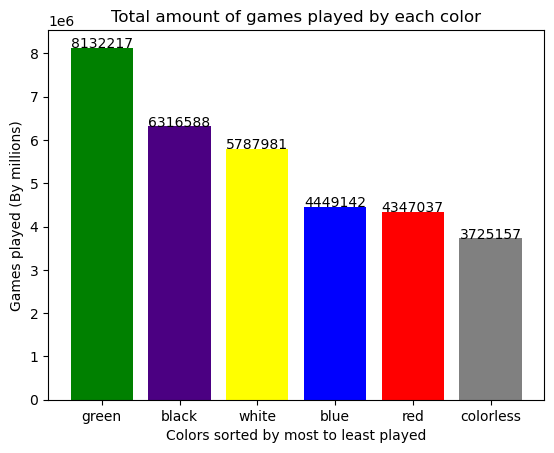

In [233]:
#Function for adding text
def addLabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center')
# Sort the data by value in descending order
colorTotalGames = dict(sorted(colorTotalGames.items(), key=lambda item: item[1], reverse=True))

# Extract sorted labels and values
labels = list(colorTotalGames.keys())
values = list(colorTotalGames.values())

# Create the bar graph
plt.bar(labels, values, color=['green', 'indigo','yellow','blue','red','grey'])

# Add titles and labels
plt.title('Total amount of games played by each color')
plt.xlabel('Colors sorted by most to least played')
plt.ylabel('Games played (By millions)')
addLabels(labels,values)

# Show the plot
plt.show()

# Results for Question A:
#### The Green cards for the Outlaws set are the most played by a wide margin from the second most played color (black) of nearly 2 million times (1,815,629). Green cards were popular picks in draft for this set.
#### Black was the second most popular color followed by White, the margin between the two are relatively similar to each other (528,607)
#### The two least played colors by over 1 million games (1,338,839 between White and Blue) are Blue and Red.
#### The margin between the toal games with Blue and Red cards is 102,105 which is the smallest margin between two colors in terms of games played. 
#### It is natural in the game of MTG that colorless cards are the least played because there are not as much Colorless cards as there are colored cards. 
#### The margin between the Colorless cards and the cards of the least played color (Red) is 621,880. 
### Green is the most played color by far, Black and White are played in most decks while Blue and Red are played the least noticeably compared to the other three colors. 

# B: Is there a strong correlation between card rarity and Win rates?¶

### Determining the average winrates of the four rarity types.

#### Counting all of the card rarities

In [175]:
rarityCounts = {'C':0,'U':0,'R':0,'M':0}
# Iterate through each row of the DataFrame
for index, row in dfMtg.iterrows():
    rarities = list(row['rarity'])
    for rarity in rarities:
        if rarity in rarityCounts:
            rarityCounts[rarity] += 1

# Printing results
print(rarityCounts)

{'C': 91, 'U': 120, 'R': 89, 'M': 68}


#### Adding the winrate values for each rarity

In [178]:
rarityWinrateSums = {'C':0,'U':0,'R':0,'M':0}
# Iterate through each row of the DataFrame
for index, row in dfMtg.iterrows():
    # Split the 'color' value into individual colors (e.g., "WU" becomes ["W", "U"])
    rarities = list(row['rarity'])
    # Add the gamesPlayed value to each of the colors found in the row
    for rarity in rarities:
        if rarity in rarityWinrateSums:
            rarityWinrateSums[rarity] += row['winrate']
print(rarityWinrateSums)

{'C': 4852.699999999998, 'U': 6389.6, 'R': 4649.4000000000015, 'M': 3604.6000000000013}


#### Determining the averages

In [181]:
rarityWinrateAverages = {key: rarityWinrateSums[key] / rarityCounts[key] for key in rarityCounts}
# Changing the names of keys
newKeys = {
    'C':'common',
    'U':'uncommon',
    'R':'rare',
    'M':'mythic'
}
rarityWinrateAverages = {newKeys[k]: v for k, v in rarityWinrateAverages.items()}
print(rarityWinrateAverages)


{'common': 53.3263736263736, 'uncommon': 53.24666666666667, 'rare': 52.24044943820226, 'mythic': 53.008823529411785}


### Creating the graph

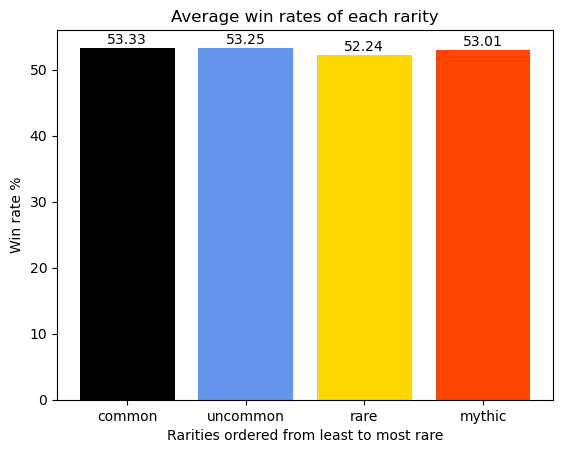

In [184]:

# Extract sorted labels and values
labels = list(rarityWinrateAverages.keys())
values = list(rarityWinrateAverages.values())

# Create the bar graph
plt.bar(labels, values, color=['black','cornflowerblue','gold','orangered'])

# Add titles and labels
plt.title('Average win rates of each rarity')
plt.xlabel('Rarities ordered from least to most rare')
plt.ylabel('Win rate %')
for i, value in enumerate(values):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

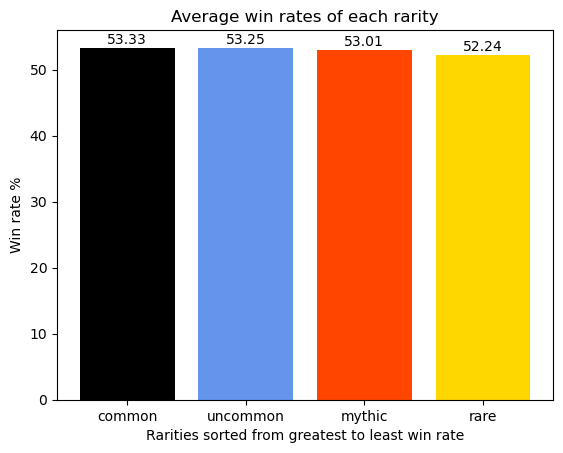

In [185]:
rarityWinrateAverages = dict(sorted(rarityWinrateAverages.items(), key=lambda item: item[1], reverse=True))
# Extract sorted labels and values
labels = list(rarityWinrateAverages.keys())
values = list(rarityWinrateAverages.values())

# Create the bar graph
plt.bar(labels, values, color=['black','cornflowerblue','orangered','gold'])
# Add titles and labels
plt.title('Average win rates of each rarity')
plt.xlabel('Rarities sorted from greatest to least win rate')
plt.ylabel('Win rate %')
for i, value in enumerate(values):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

# Results
### Determining if win rates have correlation with rarity is important to answer because players can question if having rarer cards in draft makes you more likely to win.
### When it comes to draft for this set (Outlaws of Thunder Junction), the win rates for the rarities in draft are fairly even.
#### This could be because common and uncommon cards show up more and could be played more often than the rarer cards.
### Although it is often suspected that the high rarities (rare and mythic) will yield the highest win rates in the game, these two rarities actually have the lowest win rates.
#### This is not by much however according to the data. 

# C: Does one color win more games than others? 

In [190]:
colorCounts = {'W': 0, 'U': 0, 'B': 0, 'R': 0, 'G': 0, 'C': 0}
# Iterate through each row of the DataFrame
for index, row in dfMtg.iterrows():
    colors = list(row['color'])
    for color in colors:
        if color in colorCounts:
            colorCounts[color] += 1

# Printing results
print(colorCounts)

{'W': 81, 'U': 89, 'B': 83, 'R': 81, 'G': 85, 'C': 45}


In [192]:
colorTotalWinrate = {'W': 0, 'U': 0, 'B': 0, 'R': 0, 'G': 0, 'C': 0}
# Iterate through each row of the DataFrame
for index, row in dfMtg.iterrows():
    # Split the 'color' value into individual colors (e.g., "WU" becomes ["W", "U"])
    colors = list(row['color'])
    # Add the gamesPlayed value to each of the colors found in the row
    for color in colors:
        if color in colorTotalWinrate:
            colorTotalWinrate[color] += row['winrate']
print(colorTotalWinrate)

{'W': 4377.000000000001, 'U': 4536.2, 'B': 4375.700000000002, 'R': 4222.300000000001, 'G': 4632.199999999999, 'C': 2384.6000000000004}


In [194]:
colorWinrateAverages = {key: colorTotalWinrate[key] / colorCounts[key] for key in colorCounts}
# Changing the names of keys
newKeys = {
    'W': 'white',
    'U': 'blue',
    'B': 'black',
    'R': 'red',
    'G': 'green',
    'C': 'colorless'
}
colorWinrateAverages = {newKeys[k]: v for k, v in colorWinrateAverages.items()}
print(colorWinrateAverages)

{'white': 54.037037037037045, 'blue': 50.96853932584269, 'black': 52.71927710843376, 'red': 52.127160493827176, 'green': 54.49647058823528, 'colorless': 52.99111111111112}


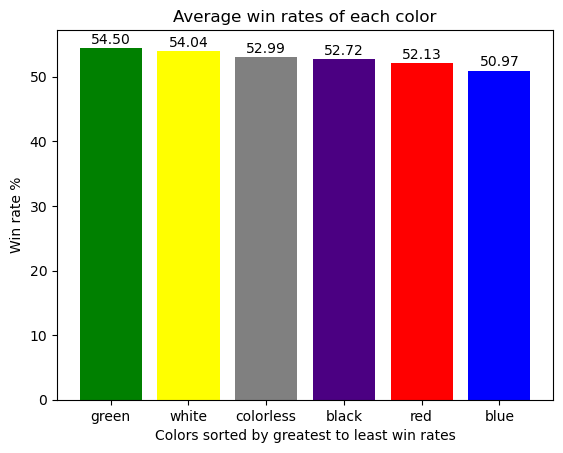

In [235]:
# Sorting by descending order
colorWinrateAverages = dict(sorted(colorWinrateAverages.items(), key=lambda item: item[1], reverse=True))
# Extract sorted labels and values
labels = list(colorWinrateAverages.keys())
values = list(colorWinrateAverages.values())

# Create the bar graph
plt.bar(labels, values, color=['green','yellow','grey','indigo','red','blue'])

# Add titles and labels
plt.title('Average win rates of each color')
plt.xlabel('Colors sorted by greatest to least win rates')
plt.ylabel('Win rate %')
for i, value in enumerate(values):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

# Results
### When it comes to win rates by color, Green leads the most with an average win rate of 54.5% followed closely by White with an average win rate of 54.04%. 
### Colorless cards did well relatively compared to other colors according to the average win rates.
#### The average win rate for colorless cards is more than the average win rates of black and red by only less than one percent, but all of the average win rates of all three of these categories are greater than that of Blue by more than 1% which is noticeable.
### The data indicates that Green cards were the most successful in the Outlaws of Thunder Junction and White did well too. 
### Colorless, Black and Red cards did fairly well.
### Although the average win rate for blue cards in this set is above 50%, it is not even a percent higher than that indicating that Blue cards performed weaker in draft in comparison to the other colors.
### There could be a correlation between games played and win rates because Green was the most played color by a wide margin while Blue and Red were the least played colors. 
### This data also shows that while colorless cards are the least played, their strength in the game is good enough to have a decent win rate average.

# D: In drafting games, do cards picked early tend to win more?

### It is expected that in draft, players have a sense of which cards do well in the game and pick those cards for their decks early.
### The following graph is a scatterplot representing each card in relation to their averagePick and winrate value.
### Cards that are picked early on average have a lower averagePick value and will be represented as a dot, cards chosen later have higher averagePick values and will be represented as squares.
### The red-yellow-green colormap is used to represent win rates.

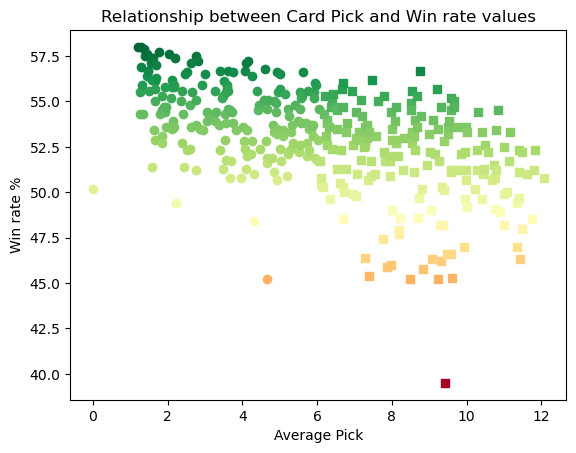

In [230]:
# Extract sorted labels and values
picks = list(dfMtg['averagePick'])
rates = list(dfMtg['winrate'])

# Normalize winrate for coloring (this will scale the winrate values to [0, 1])
norm = plt.Normalize(min(rates), max(rates))

# Scatter plot with different markers and colors
for i in range(len(picks)):
    # Color based on winrate (higher winrate should be greener)
    color = plt.cm.RdYlGn(norm(rates[i]))  # 'RdYlGn' colormap for red to green
    
    # Marker based on pick value (lower pick -> circle, higher pick -> square)
    marker = 'o' if picks[i] < np.median(picks) else 's'  # Use median as the threshold

    # Plot each point with the specific color and marker
    plt.scatter(picks[i], rates[i], color=color, marker=marker)


# Add titles and labels
plt.title('Relationship between Card Pick and Win rate values')
plt.xlabel('Average Pick')
plt.ylabel('Win rate %')


# Show the plot
plt.show()

# Results
### According to the graph, although most cards have similar win rates, cards that are chosen earlier have better win rates than the cards chosen later.
### All of the cards chosen first to third on average have win rates that are over 50% with one outlier.
### All of the cards with a win rate below 47.5% are cards that are chosen later in the draft (7th to last).
### One of the later picked cards did noticably terrible compared to the others with a win rate below 40%.

# E: Do cards played a lot in games that they can be played have higher win rates?
### It is generally assumed that cards are often played more when they are perceived to perform well in the game.
### In addition to the play and win rate percentage, I also wanted to see if cards picked early in the draft were played more and won more.

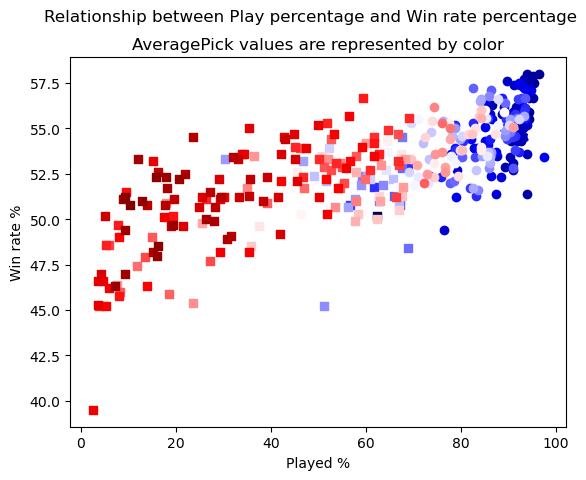

In [281]:
# Extract sorted labels and values
play = list(dfMtg['playedPercentage'])
rates = list(dfMtg['winrate'])
picks = list(dfMtg['averagePick'])

# Normalize winrate for coloring (this will scale the winrate values to [0, 1])
norm = plt.Normalize(min(picks), max(picks))

# Scatter plot with different markers and colors
for i in range(len(play)):
    # Color based on winrate (higher winrate should be greener)
    color = plt.cm.seismic(norm(picks[i]))  # 'RdYlGn' colormap for red to green
    
    # Marker based on pick value (lower play -> square, higher play -> circle)
    marker = 's' if play[i] < np.median(play) else 'o'  # Use median as the threshold

    # Plot each point with the specific color and marker
    plt.scatter(play[i], rates[i], color=color, marker=marker)


# Add titles and labels
plt.suptitle('Relationship between Play percentage and Win rate percentage')
plt.title('AveragePick values are represented by color')
plt.xlabel('Played %')
plt.ylabel('Win rate %')


# Show the plot
plt.show()

# Results
### According to the scatterplot, cards that have a higher play percentage often have greater win rate percentages.
### Cards that are not played as much generally have lower win rate percentages, the card that has the least play percentage also has the least win rate percentage.
### The colors shows that there is a correlation between play percentage, win rate percentage and average pick value. Cards that are chosen later in the draft generally are not played much and they have lower win rates (They are more red).
### Cards that are picked early (they are more blue) generally are played more and have a higher win rate.

# Saving the cleaned data in a new csv file

In [285]:
dfMtg.to_csv('dfMtg.csv', index=False)